In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf


In [2]:
mnist = pd.read_csv("/content/train.csv")


In [3]:
y = mnist.iloc[:, 0].values
X = mnist.iloc[:, 1:].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1
                                                    , random_state = 0)

In [5]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (8768, 784)
X_test shape:  (975, 784)
y_train shape:  (8768,)
y_test shape:  (975,)


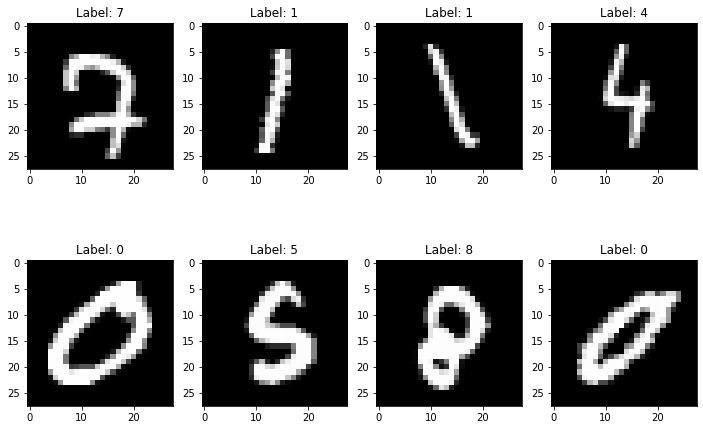

In [6]:
nrows = 2
ncols = 4

pic_indexes = np.random.randint(X_train.shape[0], size=(nrows*ncols))

f, axs = plt.subplots(nrows, ncols, figsize=(12, 8))
axs = axs.flatten()

picture_index  = 0

for picture_index, ax in zip(pic_indexes, axs):
        ax.imshow(X_train[picture_index].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {y_train[picture_index]}')

plt.show()

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [9]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (8768, 28, 28, 1)
X_test shape:  (975, 28, 28, 1)
y_train shape:  (8768, 10)
y_test shape:  (975, 10)


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [14]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(lr = 1e-3),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range= 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1
)

datagen.fit(X_train)

In [16]:
train_generator = datagen.flow(X_train, y_train, batch_size = 64)

validation_generator = datagen.flow(X_test, y_test, batch_size = 64)

In [17]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 1, factor = 0.5, min_lr = 1e-6)

model_checkpoint = ModelCheckpoint('./best_model.hdf5',monitor = 'val_loss', mode = "min", verbose = 1, save_best_model = True)

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = X_train.shape[0] // 64,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = X_test.shape[0] // 64,
    callbacks = [learning_rate_reduction, model_checkpoint]
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
137/137 [==============================] - 11s 25ms/step - loss: 2.0751 - accuracy: 0.3797 - val_loss: 5.6076 - val_accuracy: 0.1281

Epoch 00001: saving model to ./best_model.hdf5
Epoch 2/50
137/137 [==============================] - 3s 21ms/step - loss: 0.4697 - accuracy: 0.8489 - val_loss: 10.1653 - val_accuracy: 0.1250

Epoch 00002: saving model to ./best_model.hdf5
Epoch 3/50
137/137 [==============================] - 3s 22ms/step - loss: 0.2843 - accuracy: 0.9098 - val_loss: 11.2221 - val_accuracy: 0.1437

Epoch 00003: saving model to ./best_model.hdf5
Epoch 4/50
137/137 [==============================] - 3s 22ms/step - loss: 0.2208 - accuracy: 0.9307 - val_loss: 9.2979 - val_accuracy: 0.1490

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00004: saving model to ./best_model.hdf5
Epoch 5/50
137/137 [==============================] - 3s 22ms/step - loss: 0.1577 - accuracy: 0.9506 - val_loss: 1.6283 - val_accuracy: 0.5813

Epoch 00

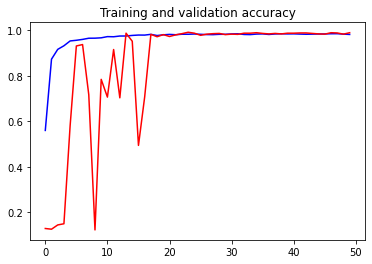

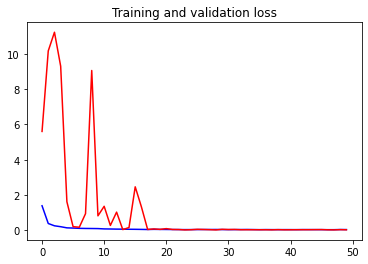

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(accuracy)

plt.plot(range(epochs), accuracy, 'b', label='Training accuracy')
plt.plot(range(epochs), val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(range(epochs), loss, 'b', label='Training Loss')
plt.plot(range(epochs), val_loss, 'r', label='Training Loss')
plt.title('Training and validation loss')

plt.show()

In [20]:
model.evaluate(X_test, y_test, verbose = 1)


31/31 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.9887


[0.03276655822992325, 0.9887179732322693]